# <h1 align="center"> © 2025 [RsydMathTech](https://github.com/RsydMathTech) </h1>

---

## Supermarket Sales Analysis & Prediction  

This project is part of my learning journey in Data Analytics & Data Science.  
The dataset comes from supermarket sales transactions, with a focus on:  

- **Exploratory Data Analysis (EDA):** understanding sales patterns, transaction distribution, and customer behavior.  
- **Data Visualization:** creating line plots, histograms, and boxplots to uncover insights.  
- **Machine Learning Modeling:** applying a *Random Forest Regressor* to predict *gross income* based on transaction features.  

The main goal of this project is to demonstrate how **data can be transformed into valuable information**,  
which can ultimately be used to **support business decision-making** in the retail sector.  


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates 

plt.style.use("dark_background")

sns.set_theme(
    style="dark",
    rc={
        "axes.facecolor": "#000000",
        "figure.facecolor": "#000000",
        "axes.labelcolor": "white",
        "text.color": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "#333333"
    }
)

url = "https://raw.githubusercontent.com/sushantag9/Supermarket-Sales-Data-Analysis/master/supermarket_sales%20-%20Sheet1.csv"
df = pd.read_csv(url)

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Hour'] = df['Time'].dt.hour
df['Week'] = df['Date'].dt.isocalendar().week

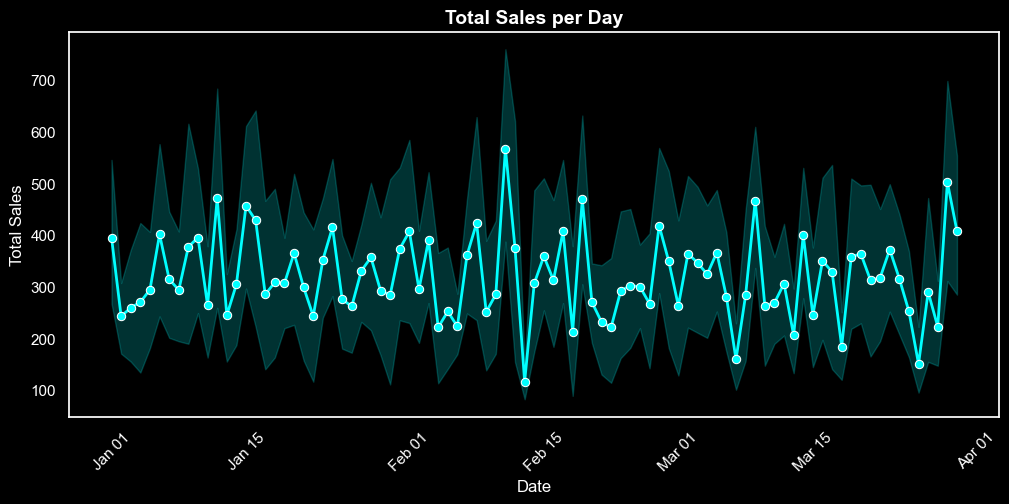

In [9]:
plt.figure(figsize=(12,5))
sns.lineplot(x="Date", y="Total", data=df, marker="o", color="cyan", linewidth=2)
plt.title("Total Sales per Day", color="white", fontsize=14, weight="bold")
plt.xlabel("Date", color="white")
plt.ylabel("Total Sales", color="white")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.savefig("total_sales_per_day.png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

### Daily Sales Trend  

The daily sales trend shows significant fluctuations, with total sales ranging from around 100 to over 600 per day.  
There is **no clear seasonal pattern** across the three-month period, but several **sales spikes** can be observed,  
which may be related to specific events, promotions, or payday periods.  

This indicates that customer purchases are **highly variable from day to day**, suggesting the importance of  
monitoring daily sales performance to quickly identify unusual drops or peaks.  

---

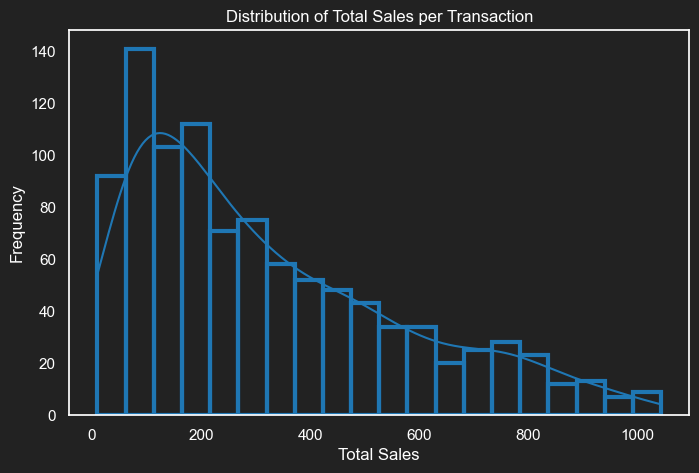

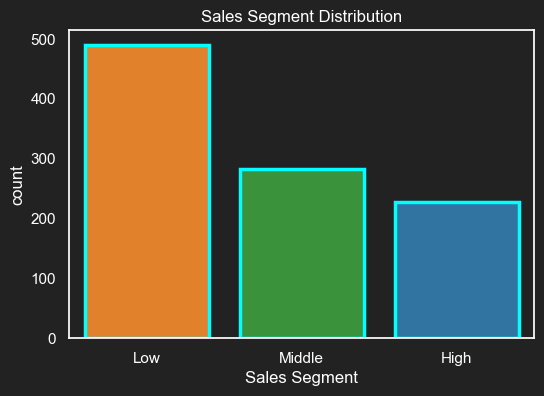

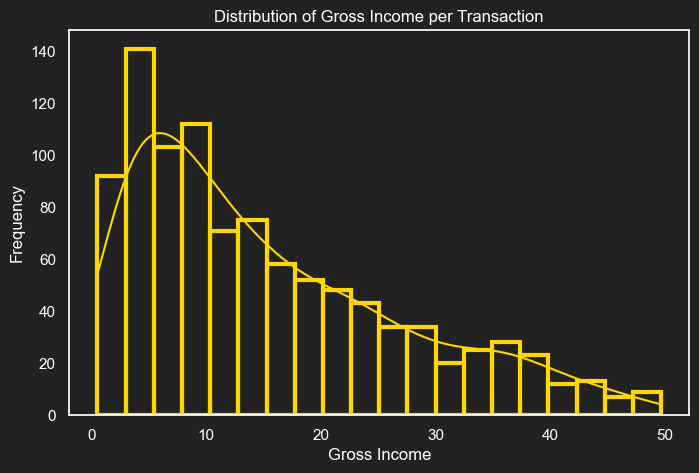

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df["Total"], bins=20, kde=True, color="#1f77b4", fill=False, linewidth=3, edgecolor="cyan")
plt.title("Distribution of Total Sales per Transaction", color="white")
plt.xlabel("Total Sales", color="white")
plt.ylabel("Frequency", color="white")
plt.savefig("dist_total_sales.png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

def sales_segment(total):
    if total <= 250:
        return "Low"
    elif total < 500:
        return "Middle"
    elif total >= 500:
        return "High"
    else:
        return "Nothing"
df["Sales Segment"] = df["Total"].apply(sales_segment)

df_filtered = df[df["Sales Segment"] != "Nothing"]

plt.figure(figsize=(6,4))
sns.countplot(x="Sales Segment", hue="Sales Segment", data=df_filtered, order=["Low","Middle","High"], palette=["#1f77b4","#ff7f0e","#2ca02c"], edgecolor="cyan", linewidth=2.5, legend=False)
plt.title("Sales Segment Distribution", color="white")
plt.savefig("sales_segment_dist.png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df["gross income"], bins=20, kde=True, color="gold", fill=False, linewidth=3, edgecolor="cyan")
plt.title("Distribution of Gross Income per Transaction", color="white")
plt.xlabel("Gross Income", color="white")
plt.ylabel("Frequency", color="white")
plt.savefig("dist_gross_income.png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()


## Distribution of Total Sales and Gross Income per Transaction  

The distribution of both total sales and gross income per transaction is **right-skewed**,  
indicating that most transactions fall within the **low-to-mid range**.  

### Total Sales Segmentation  
- **Low (0–200):** Majority of transactions are in this range, showing customers mostly make small purchases.  
- **Middle (201–400):** Represents a significant portion of transactions with moderate spending.  
- **High (401-700):** Rare but important, as these transactions generate substantial revenue.  

### Gross Income Segmentation  
- **Low (0–5):** Most frequent, indicating small profit margins dominate.  
- **Middle (6–15):** Covers a sizeable group of transactions with moderate profit.  
- **High (>15):** Less common, but these transactions bring high profitability despite their lower frequency.  

**Insight:**  
The supermarket business is primarily driven by **small-to-medium transactions**, both in sales and profit.  
However, **high-value purchases and high-profit transactions, while less frequent, contribute disproportionately to overall revenue** and should be strategically nurtured.  

---

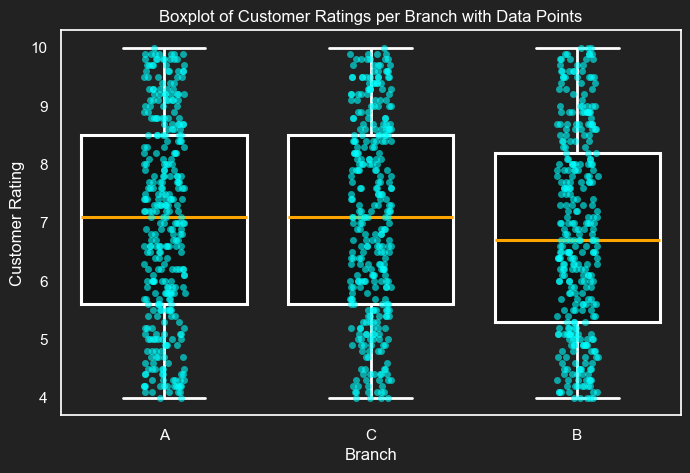

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Branch", y="Rating", data=df, color="#111111", fliersize=0, linewidth=2.2, 
            boxprops=dict(edgecolor="white"), whiskerprops=dict(color="white", linewidth=2), 
            capprops=dict(color="white", linewidth=2), medianprops=dict(color="orange", linewidth=2.2))
sns.stripplot(x="Branch", y="Rating", data=df, color="cyan", alpha=0.6)
plt.title("Boxplot of Customer Ratings per Branch with Data Points", color="white")
plt.xlabel("Branch", color="white")
plt.ylabel("Customer Rating", color="white")
plt.savefig("boxplot_ratings_branch.png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

## Boxplot: Customer Rating by Branch
### Customer Ratings per Branch (Boxplot Insight)

- **Branch A & C** → Median ≈ **7.0**, IQR ≈ **5.8–8.5** → almost identical, stable satisfaction.  
- **Branch B** → Median ≈ **6.8**, IQR ≈ **5.5–8.2** → slightly lower, wider spread, more variation in ratings.  

Branch **B** needs targeted improvement to raise consistency and match A & C’s performance.

---

## Conclusion and Insight


The analysis highlights that the supermarket’s revenue model is heavily dependent on **frequent low-to-mid range transactions**, with occasional **high-value purchases providing significant boosts**. Daily sales fluctuate strongly without a clear seasonal trend, underscoring the need for **continuous monitoring** and **quick response to anomalies**.  

Customer satisfaction is generally positive, but **Branch B lags slightly** in both median score and consistency compared to Branch A and C, signaling an opportunity for **service and operational improvements**.  

Overall, the supermarket thrives on **transaction volume**, but long-term growth may require strategies to **increase average basket size, nurture high-value customers, and standardize customer experience across branches**.  


---
# Supermarket Sales Prediction with Ensemble Machine Learning

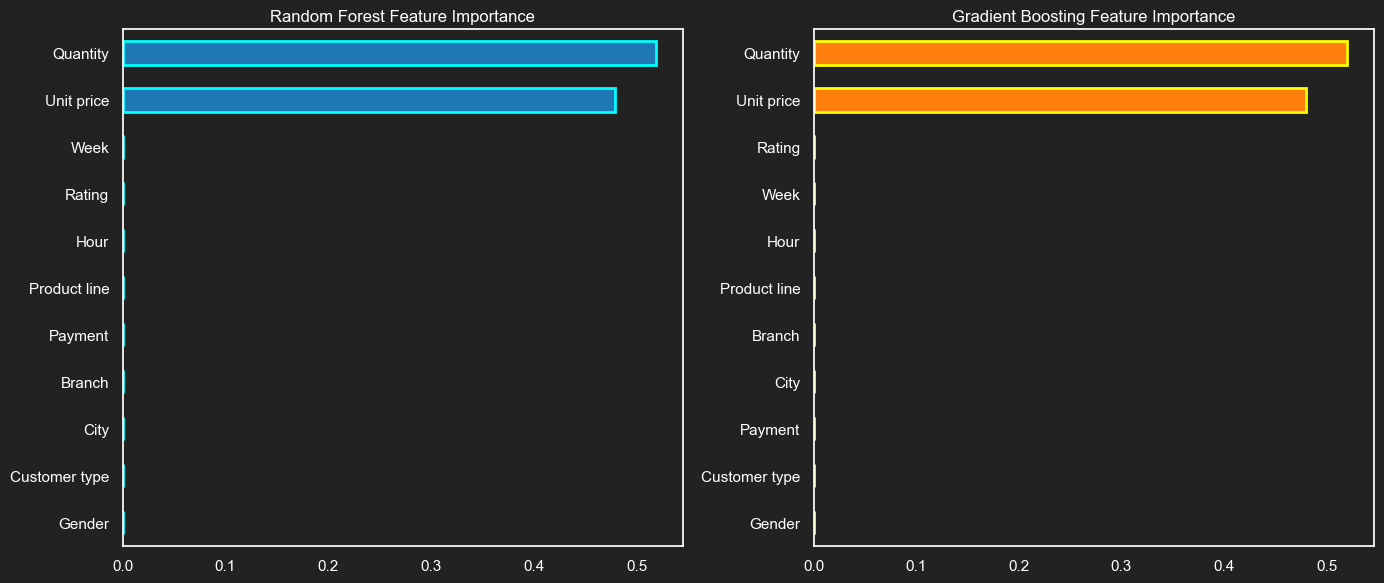

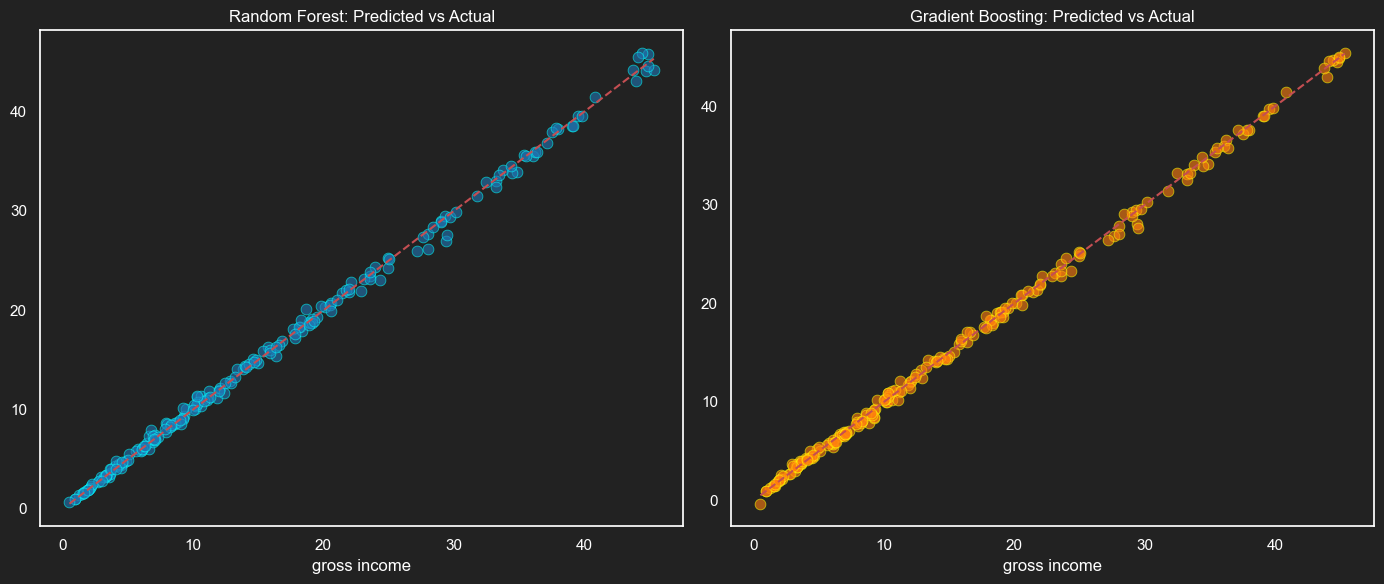

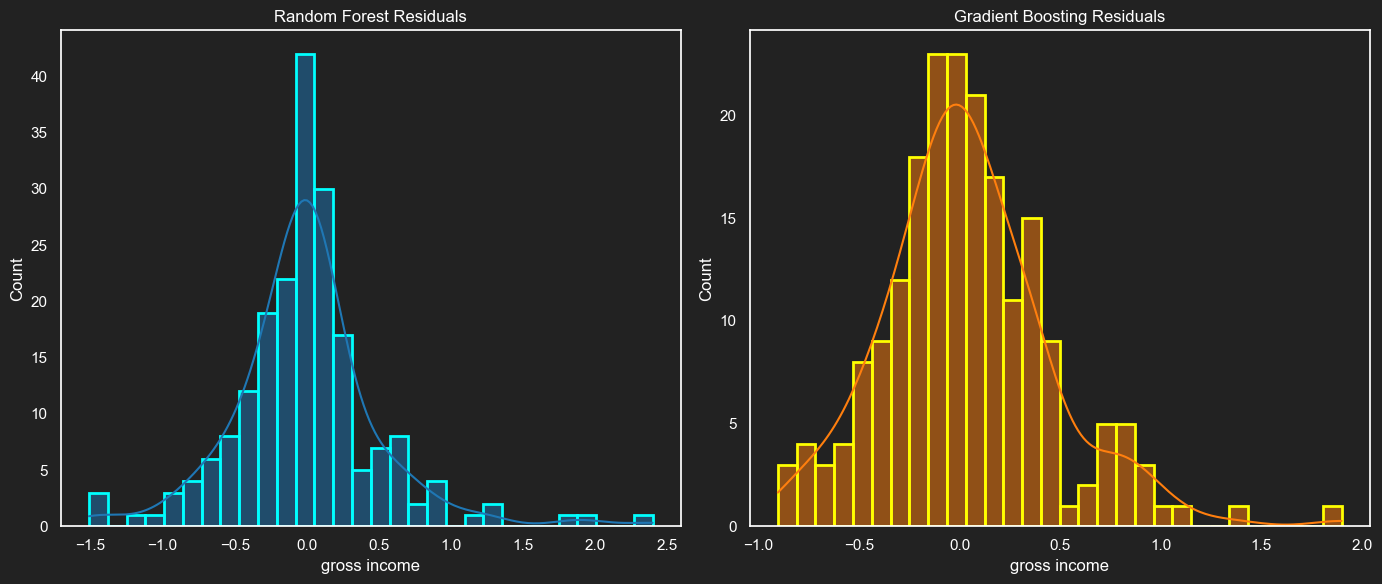

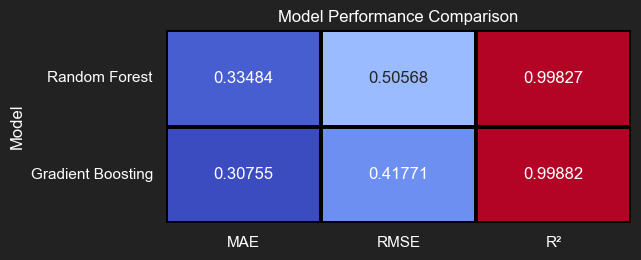

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

sns.set_theme(style="dark", rc={"axes.facecolor": "#222222", "figure.facecolor": "#222222"})
plt.rcParams.update({
    "text.color": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "axes.edgecolor": "white"
})

url = "https://raw.githubusercontent.com/sushantag9/Supermarket-Sales-Data-Analysis/master/supermarket_sales%20-%20Sheet1.csv"
df = pd.read_csv(url)

df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Hour'] = df['Time'].dt.hour
df['Week'] = df['Date'].dt.isocalendar().week

data = df.copy()
le = LabelEncoder()
for col in ['Branch','Gender','Customer type','Payment','City','Product line']:
    data[col] = le.fit_transform(data[col])

X = data[['Unit price','Quantity','Rating','Branch','Gender',
          'Customer type','Payment','City','Product line','Hour','Week']]
y = data['gross income']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

feat_importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances_gb = pd.Series(gb.feature_importances_, index=X.columns)

fig, axes = plt.subplots(1, 2, figsize=(14,6))
feat_importances_rf.sort_values().plot(kind='barh', ax=axes[0],
    color="#1f77b4", edgecolor="cyan", linewidth=2)
axes[0].set_title("Random Forest Feature Importance", color="white")

feat_importances_gb.sort_values().plot(kind='barh', ax=axes[1],
    color="#ff7f0e", edgecolor="yellow", linewidth=2)
axes[1].set_title("Gradient Boosting Feature Importance", color="white")

plt.tight_layout()
plt.savefig("feature_importance_gross_income.png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.scatterplot(x=y_test, y=y_pred_rf, ax=axes[0],
    color="#1f77b4", edgecolor="cyan", s=60, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("Random Forest: Predicted vs Actual", color="white")

sns.scatterplot(x=y_test, y=y_pred_gb, ax=axes[1],
    color="#ff7f0e", edgecolor="yellow", s=60, alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].set_title("Gradient Boosting: Predicted vs Actual", color="white")

plt.tight_layout()
plt.savefig("pred_vs_actual_gross_income.png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.histplot(y_test - y_pred_rf, bins=30, kde=True, ax=axes[0],
    color="#1f77b4", edgecolor="cyan", linewidth=2)
axes[0].set_title("Random Forest Residuals", color="white")

sns.histplot(y_test - y_pred_gb, bins=30, kde=True, ax=axes[1],
    color="#ff7f0e", edgecolor="yellow", linewidth=2)
axes[1].set_title("Gradient Boosting Residuals", color="white")

plt.tight_layout()
plt.savefig("error_distribution_gross_income.png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

results = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting"],
    "MAE": [mae_rf, mae_gb],
    "RMSE": [rmse_rf, rmse_gb],
    "R²": [r2_rf, r2_gb]
})

plt.figure(figsize=(6,2.5))
sns.heatmap(results.set_index("Model"), annot=True, fmt=".5f",
            cmap="coolwarm", cbar=False, linewidths=1.5, linecolor="black")
plt.title("Model Performance Comparison", color="white")
plt.yticks(rotation=0, color="white")
plt.xticks(color="white")
plt.savefig("model_performance_gross_income.png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

---

# Conclusion and Insight from Ensemble Machine Learning

---

## 1. Objective
Developed a complete machine learning pipeline to predict **gross income per transaction** using **Random Forest** and **Gradient Boosting Regressors**.  
The goal was to showcase **end-to-end regression workflow**, feature engineering, ensemble modeling, and robust evaluation.

---

## 2. Model Performance Comparison

| Model                     | MAE   | RMSE  | R²     |
|----------------------------|-------|-------|--------|
| Random Forest Regressor    | 0.33484  | 0.50568 | 0.99827 |
| Gradient Boosting Regressor| 0.30755  | 0.41771  | 0.99882 |

- **Gradient Boosting** slightly outperforms Random Forest.  
- High R² reflects the deterministic nature of **gross income = Unit Price × Quantity**, not overfitting, demonstrating careful interpretation of model performance.

---

## 3. Feature Importance & Observed Patterns

- **Unit Price** and **Quantity** are the primary drivers, as expected.  
- Other features (Hour, Week, Branch, Payment, City, Product line, Rating) reveal **subtle, data-driven patterns**, demonstrating proficiency in feature analysis beyond dominant predictors:  
  - Certain branches consistently contribute slightly higher revenue.  
  - Product lines such as Health & Beauty show modest positive impact.  
  - Peak hours reflect measurable, though secondary, effects on gross income.  

> This analysis illustrates the ability to extract **both primary and nuanced insights** from structured transactional data.

---

## 4. Predicted vs Actual & Residual Analysis

- Predicted values align closely with actuals, forming an almost perfect diagonal in scatter plots.  
- Gradient Boosting residuals are tightly centered around zero, confirming stability and robustness.  
- Residual analysis highlights **nuanced deviations**, revealing potential outliers or unusual purchasing patterns — a demonstration of practical exploratory data analysis.

---

## 5. Key Takeaways

- Successfully implemented an **end-to-end ML workflow**: preprocessing, encoding, ensemble modeling, evaluation, and visualization.  
- Gradient Boosting Regressor is the recommended model for gross income prediction.  
- Analysis demonstrates **ML expertise, attention to detail, and ability to uncover insights**, even when primary predictors dominate the target.

---